In [198]:
import pandas as pd
import gzip
import json
from matplotlib import pyplot as plt
from collections import defaultdict
import sklearn
from sklearn import linear_model
import numpy
import random
import gzip
import math
import scipy
import scipy.optimize




def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Video_Games_5.json.gz')

In [199]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
import sklearn
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
f = gzip.open("Video_Games_5.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))
    


In [4]:
print(len(dataset))
#print(len(dataset[]))
keyDict = defaultdict(list)
keyLens = []
for d in dataset:
    keyDict[len(d.keys())].append(d)
    keyLens.append((len(d.keys())))
print(type(keyLens))
print(len(keyLens))


497577
<class 'list'>
497577


In [5]:
minKeys = min(keyLens)
maxKeys = max(keyLens)
avgKeys = np.mean(keyLens) 
print(minKeys) #there are at least 7 keys that show up on all of them
print(maxKeys) #max 12 which is consistent with the dataframe values
print(avgKeys) #on average 9.8 keys show up we need to figure out which 7 keys are always there
print(keyDict[minKeys][0].keys())
print(len(keyDict[minKeys]))
print(len(keyDict[8]))
print(keyDict[9][0].keys())

#from this we find that we need three main keys reviewText, summary, reviewerName/reviewerId, reviewTime(for the timeframe)
#most reviews have those but not always reviewText and summary so if it doesnt have this then we will remove it from the dataset

7
12
9.80454080473977
dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'unixReviewTime'])
3
90
dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])


In [6]:
print(len(keyDict[9]))
print(len(keyDict[10]))
print(len(keyDict[11]))
print(len(keyDict[12]))
lenNinePlus = (len(keyDict[9]) + len(keyDict[10]) + len(keyDict[11]) + len(keyDict[12]))

162136
271215
63197
936


In [7]:
mainKeyList = ['overall', 'reviewerName', 'reviewText','reviewTime', 'asin'] #these are the main things we need
mainD = []

print(mainKeyList)
for d in dataset:
    #print(type(d))
    #print(list(d.keys()))
    truth = True
    for c in mainKeyList:
        if c not in list(d.keys()):
            truth = False
    if truth:
        mainD.append(d)
    #if mainKeyList in list(d.keys()): #we will keep only these data 
        #mainD.append(d)


['overall', 'reviewerName', 'reviewText', 'reviewTime', 'asin']


In [8]:
print(len(mainD)) 
lenNinePlus = (len(keyDict[9]) + len(keyDict[10]) + len(keyDict[11]) + len(keyDict[12]))
print(len(mainD) < lenNinePlus) #interestingly its less than the added up ones but makes sense

497343
True


In [9]:
mainDf = pd.DataFrame(mainD)
mainDf.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [10]:
#mainDf = mainDf.drop(labels = [])
numNull = []
numNull.append(mainDf['overall'].isna().sum())
numNull.append(mainDf['verified'].isna().sum())
numNull.append(mainDf['reviewTime'].isna().sum())
numNull.append(mainDf['reviewerID'].isna().sum())
numNull.append(mainDf['asin'].isna().sum())
numNull.append(mainDf['reviewerName'].isna().sum())
numNull.append(mainDf['reviewText'].isna().sum())
numNull.append(mainDf['summary'].isna().sum())
numNull.append(mainDf['unixReviewTime'].isna().sum())
numNull.append(mainDf['vote'].isna().sum())
numNull.append(mainDf['style'].isna().sum())
numNull.append(mainDf['image'].isna().sum())


print(numNull) #first 5 make sense since we literally decided that these columsn shouldnt be empty
#interestingly reviewer name isnt empty either so thats nice but also not necessary
#also interestingly the summary isnt empty sinse its supposed to correlate with the reviewTexxt, summary = 6 (starting from 0)
#the last three were expected to have been not 0 since there might not have existed those features dating to back then
#lets first run data visualization on these values
print(len(numNull))

mainDf.isna().sum()

[0, 0, 0, 0, 0, 0, 0, 103, 0, 389575, 208268, 493750]
12


overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText             0
summary              103
unixReviewTime         0
vote              389575
style             208268
image             493750
dtype: int64

first 5 make sense since we literally decided that these columsn shouldnt be empty
interestingly reviewer name isnt empty either so thats nice but also not necessary
also interestingly the summary isnt empty sinse its supposed to correlate with the reviewTexxt, summary = 6 (starting from  the last three were expected to have been not 0 since there might not have existed those features dating to back then

Before we run data visualization on these values lets first fill the values with zeros. First we recognizae that style and image are useless to the rating we are aiming to predict 

In [11]:
print(mainDf.dtypes)
print(list(mainDf['vote'])) #notice that the vote is a string that can be made into a number so we will do that

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '28', '11', nan, nan, '2', '14', nan, nan, '12', nan, nan, nan, nan, nan, nan, nan, nan, nan, '7', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '9', '13', nan, nan, '4', '7', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '11', '55', nan, '4', nan, '25', nan, nan, nan, '2', nan, nan, nan, '2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [12]:
#replace all nans with zero
mainDf['vote'] = mainDf['vote'].fillna(0)
#mainDf['vote'] = [int(x) for x in list(mainDf['vote'])] 

In [13]:
#so we get this error invalid literal for int() with base 10: '1,000'
#to fix this we willl first check if string

In [14]:
import re

In [15]:
print(type(list(mainDf['vote'])[12])) #notice 
tempVotes = []
for x in mainDf['vote']:
    #print(isinstance(x,int))
    if not isinstance(x,int):
        res = re.sub(r'[^\w\s]', '', x)
        tempVotes.append(int(res))
    else:
        tempVotes.append(x)
        
print(len(tempVotes))

#mainDf['vote'] = [int( re.sub(r'[^\w\s]', '', test_str)) for x in list(mainDf['vote']) if type(x) != 'int'] 

<class 'str'>
497343


In [16]:
for x in tempVotes:
    if not isinstance(x,int):
        print("Failed")
        print(type(x))
    else:
        pass
#this basically checks to make sure all values are ints

In [17]:
mainDf['vote'] = tempVotes

In [18]:
mainDf.describe() # we got one more int column which works. another thing to consider is when the votes got implemented to get an idea for which values to remove too

,overall,unixReviewTime,vote
count,497343.000000,4.973430e+05,497343.000000
mean,4.220329,1.367812e+09,2.309040
std,1.185478,1.224234e+08,17.137017
min,1.000000,9.398592e+08,0.000000
25%,4.000000,1.316477e+09,0.000000
50%,5.000000,1.410134e+09,0.000000
75%,5.000000,1.452298e+09,0.000000
max,5.000000,1.538438e+09,2474.000000


In [19]:
#so we want to create a filter that allows us to incorporate votes as well to create a dataframe of the val
listVals = [x for x in mainDf['overall'] if x < 0]
print(len(listVals)) #we dont need to check this since describe does this for us and we dont have a single incorrect value
#by looking at the min

0


In [20]:
#lets first rename the overall column because it should be named rating
mainDf = mainDf.rename(columns = {'overall': 'rating'})
mainDf.head() #this worked

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,0,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,NaN,NaN


In [21]:
#lets try filtering now
newDf = mainDf[mainDf['vote'] == 0]
(newDf.head())
#newDf.dtypes

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,0,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,NaN,NaN


In [22]:
print(len(newDf)) #thats a lot of votes with zero

#lets get a list of the years of the dataframe
years = []
years = [int(x[-4:]) for x in newDf['reviewTime']] #this is originally a string which we will now convert to a datatime
print(years[:100])
print(pd.DataFrame(years).describe()) #idk what to do with this information

389575
[2015, 2015, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2013, 2012, 2011, 2011, 2013, 2013, 2015, 2015, 2014, 2014, 2013, 2014, 2014, 2014, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2012, 2012, 2012, 2012, 2011, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2013, 2013, 2013, 2013, 2013, 2011, 2010, 2018, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016]
                   0
count  389575.000000
mean     2013.643375
std         3.312475
min      1999.000000
25%      2013.000000
50%      2015.000000
75%      2016.000000
max      2018.000000


Shape of the data

In [23]:
print(mainDf.describe())  #we just remembered that the unixReviewTime is useless so we will drop these as well

              rating  unixReviewTime           vote
count  497343.000000    4.973430e+05  497343.000000
mean        4.220329    1.367812e+09       2.309040
std         1.185478    1.224234e+08      17.137017
min         1.000000    9.398592e+08       0.000000
25%         4.000000    1.316477e+09       0.000000
50%         5.000000    1.410134e+09       0.000000
75%         5.000000    1.452298e+09       0.000000
max         5.000000    1.538438e+09    2474.000000


In [24]:
mainDf = mainDf.drop(['unixReviewTime', 'style', 'image'], axis=1)


In [25]:
mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0


In [26]:
print(mainDf.dtypes)
#from here we notice that there are only two integer values lets see what we can do with this data

rating          float64
verified           bool
reviewTime       object
reviewerID       object
asin             object
reviewerName     object
reviewText       object
summary          object
vote              int64
dtype: object


In [27]:
#you can convert asin to an integer if you want or check to make sure the length of each asin is at least 
#print(len('0700026657')) #10, 
for x in mainDf['asin']:
    if len(x) != 10:
        print("fake asin")
    else:
        pass
#no output so we can keep it as is or conver it to an int idk

#something to consider is maybe dropping the verified

In [28]:
mainDf['reviewYear'] = mainDf['reviewTime'].apply(lambda x: int(x[-4:]))
mainDf[mainDf['vote']==0].groupby('reviewYear').count().sort_values('verified')

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote
reviewYear,,,,,,,,,
1999,14,14,14,14,14,14,14,14,14
2000,621,621,621,621,621,621,621,621,621
2006,2206,2206,2206,2206,2206,2206,2206,2205,2206
2001,2497,2497,2497,2497,2497,2497,2497,2497,2497
2005,2737,2737,2737,2737,2737,2737,2737,2736,2737
2004,2904,2904,2904,2904,2904,2904,2904,2904,2904
2003,3490,3490,3490,3490,3490,3490,3490,3490,3490
2002,3917,3917,3917,3917,3917,3917,3917,3915,3917
2007,4542,4542,4542,4542,4542,4542,4542,4542,4542


In [29]:
mainDf[mainDf['reviewYear'] == '1998']

mainDf['reviewLength'] = [len(x) for x in mainDf['reviewText']]

mainDf.describe()

,rating,vote,reviewYear,reviewLength
count,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963
std,1.185478,17.137017,3.899879,1266.191356
min,1.000000,0.000000,1999.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000
50%,5.000000,0.000000,2014.000000,210.000000
75%,5.000000,0.000000,2016.000000,710.000000
max,5.000000,2474.000000,2018.000000,32721.000000


In [30]:
#mainDf.plot(x='rating',y='reviewLength')

In [31]:
#we will now do the line plot of rating over time. There will be 6 lines
# for rating of 1, 2, 3, 4, 5, and average rating.
#on the y axis is the count and the x axis is the year

mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0,2015,8
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58


In [32]:
#we will filter and run everything again

lower1, upper9 = np.percentile(mainDf['numWords'], [10, 94])
print(lower1, upper9)

upperNine = np.percentile(mainDf['numWords'], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
print (upperNine)

eightyFive = np.percentile(mainDf['numWords'], [85])
print(eightyFive)



#we notice that some reviews have either lots of words or not enough words so we will filter by having each review being above 10 words
#which is approx 25% and between 250 words. This between 1 sentence per review and a mini paragraph which is good

filteredDf = mainDf[mainDf['numWords'] > 10]
filteredDf #reduced the size of dataframe by 100,000 or about 20%



filteredDf = filteredDf[filteredDf['numWords'] < 250]
filteredDf #this reduced size to about 300k which means we filtered  nearly 40% of our data whihc is good

























KeyError: 'numWords'

In [33]:
mainDf.describe()

,rating,vote,reviewYear,reviewLength
count,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963
std,1.185478,17.137017,3.899879,1266.191356
min,1.000000,0.000000,1999.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000
50%,5.000000,0.000000,2014.000000,210.000000
75%,5.000000,0.000000,2016.000000,710.000000
max,5.000000,2474.000000,2018.000000,32721.000000


In [34]:
yearDf = mainDf.groupby('reviewYear')
yearDf.head()
#yearDf.describe()
#yearDf[yearDf['rating'] == 5.0]
#yearDf[yearDf['rating']  > 0]

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0,2015,8
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58
...,...,...,...,...,...,...,...,...,...,...,...
704,5.0,False,"11 25, 1999",A3NK7ASILKG3TX,B00000DMAD,Simon Lund Larsen,If you liked Full Trottle and love LucasArts' ...,LucasArts have done it again,8,1999,426
2599,3.0,True,"02 14, 2018",AHGW67EQ751LS,B00000J2W7,Max Werner,"It won't autosave, and it resets progress on r...",Three Stars,0,2018,94
2704,3.0,True,"03 16, 2018",AYXTNDD9FJBVK,B00000J97G,C,Missing battery cover,Three Stars,0,2018,21
3104,5.0,True,"01 2, 2018",A3ISBEPYLY8IMO,B00000JRSB,Jimmy,Received this in perfect condition. Great rese...,Received this in perfect condition. Great rese...,0,2018,258


In [35]:
five = mainDf[mainDf['rating'] == 5].groupby('reviewYear').count()
five
four = mainDf[mainDf['rating'] == 4].groupby('reviewYear').count()
three = mainDf[mainDf['rating'] == 3].groupby('reviewYear').count()
two = mainDf[mainDf['rating'] == 2].groupby('reviewYear').count()
one = mainDf[mainDf['rating'] == 1].groupby('reviewYear').count()
avg = mainDf.groupby('reviewYear')['rating'].mean()
avg #now we got everything we need

reviewYear
1999    4.259259
2000    4.066703
2001    4.101384
2002    4.096708
2003    4.060151
2004    4.002760
2005    4.001798
2006    3.881760
2007    3.989402
2008    3.947143
2009    3.970190
2010    3.963285
2011    4.005543
2012    4.026498
2013    4.229022
2014    4.309473
2015    4.365534
2016    4.337505
2017    4.341998
2018    4.333813
Name: rating, dtype: float64

In [36]:
mainDf.describe()

,rating,vote,reviewYear,reviewLength
count,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963
std,1.185478,17.137017,3.899879,1266.191356
min,1.000000,0.000000,1999.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000
50%,5.000000,0.000000,2014.000000,210.000000
75%,5.000000,0.000000,2016.000000,710.000000
max,5.000000,2474.000000,2018.000000,32721.000000


In [37]:
#time to create the plots. Our x axis stays the same every time its the years
x = mainDf['reviewYear']
x = list(x)
#for val in x:
    #print(type(x))
print(type(x))
x = set(x)
print(x)
x = list(x)
print(x)
#x = x.sort()
#x = [int(val) for val in x]
print(type(x))
#for val in x:
    #print(type(val))
xAxis = x
xAxis

<class 'list'>
{1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>


[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [38]:
one
y1 = list(one['rating'])
print(y1)
y2 = list(two['rating'])
print(y2)
y3 = list(three['rating'])
print(y3)
y4 = list(four['rating'])
print(y4)
y5 = list(five['rating'])
print(y5)
print(avg)
yAvg = list(avg)
print(yAvg)
print(len(yAvg) == len(y2)) #so we got all the y vals

[3, 99, 260, 394, 326, 498, 503, 535, 629, 1465, 1491, 1486, 1435, 2222, 2814, 4157, 4905, 4533, 2413, 705]
[6, 142, 317, 476, 457, 463, 525, 564, 721, 1316, 1314, 1236, 1262, 1590, 2280, 3067, 3411, 3004, 1510, 469]
[4, 234, 660, 883, 889, 909, 1050, 1046, 1523, 2653, 2712, 2479, 2463, 3163, 4918, 6434, 7126, 5966, 3061, 953]
[22, 445, 1298, 1871, 2125, 2028, 2086, 1954, 2860, 5024, 5190, 4450, 4746, 5880, 9260, 12239, 13797, 11157, 5466, 1732]
[46, 939, 2594, 3728, 3202, 3349, 3623, 2946, 4741, 8669, 9219, 8734, 9399, 13713, 28968, 47867, 62022, 51164, 26714, 7947]
reviewYear
1999    4.259259
2000    4.066703
2001    4.101384
2002    4.096708
2003    4.060151
2004    4.002760
2005    4.001798
2006    3.881760
2007    3.989402
2008    3.947143
2009    3.970190
2010    3.963285
2011    4.005543
2012    4.026498
2013    4.229022
2014    4.309473
2015    4.365534
2016    4.337505
2017    4.341998
2018    4.333813
Name: rating, dtype: float64
[4.2592592592592595, 4.06670252824099, 4.10138

In [39]:
print(x)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


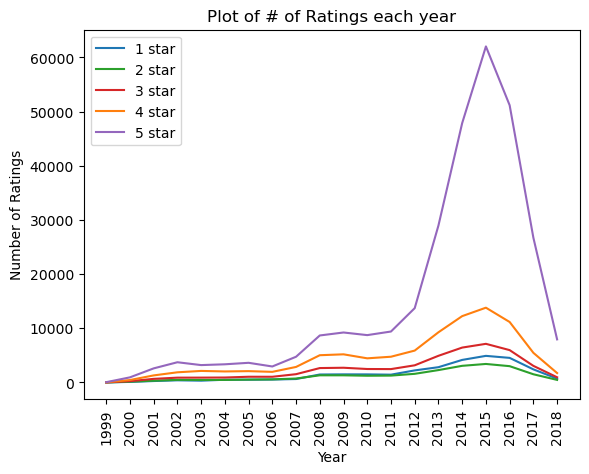

In [40]:
#This is for the Plot of the # of ratings each year
plt.plot(x, y1, color = 'tab:blue')
plt.plot(x, y2, color = 'tab:green')
plt.plot(x, y3, color = 'tab:red')
plt.plot(x, y4, color = 'tab:orange')
plt.plot(x, y5, color = 'tab:purple')
#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['1 star', '2 star', '3 star', '4 star', '5 star'])
plt.title("Plot of # of Ratings each year")
plt.show()

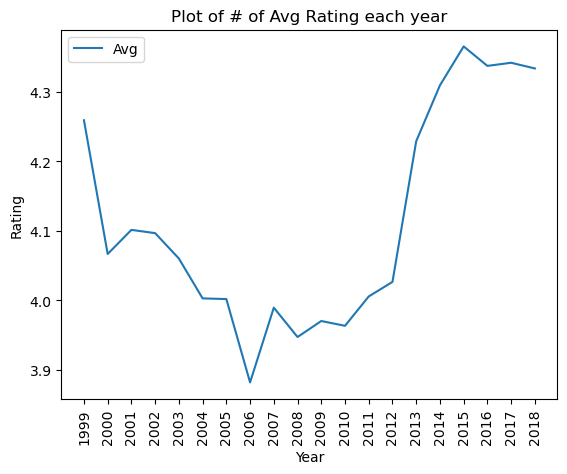

In [41]:
#plot of avg rating over the years
#This is for the Plot of the # of ratings each year
plt.plot(x, yAvg, color = 'tab:blue')

#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['Avg'])
plt.title("Plot of # of Avg Rating each year")
plt.show()


#So from this plot we can see that avg rating given has decreased each year from 1999 to 2006 
#with a general trend of increasing after

#if anyone can figure out how to get min, max, and avg of values on a plot that would be great

In [42]:
#we need to change the data so its a percentage
totals = mainDf.groupby('reviewYear').count()
totals

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewLength
reviewYear,,,,,,,,,,
1999,81,81,81,81,81,81,81,81,81,81
2000,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859
2001,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129
2002,7352,7352,7352,7352,7352,7352,7352,7350,7352,7352
2003,6999,6999,6999,6999,6999,6999,6999,6998,6999,6999
2004,7247,7247,7247,7247,7247,7247,7247,7247,7247,7247
2005,7787,7787,7787,7787,7787,7787,7787,7786,7787,7787
2006,7045,7045,7045,7045,7045,7045,7045,7043,7045,7045
2007,10474,10474,10474,10474,10474,10474,10474,10474,10474,10474


In [89]:
y1 = list(one['rating'] / totals['rating'])
print(y1)
y2 = list(two['rating'] / totals['rating'])
print(y2)
y3 = list(three['rating'] / totals['rating'])
print(y3)
y4 = list(four['rating'] / totals['rating'])
print(y4)
y5 = list(five['rating'] / totals['rating'])
print(y5)

yAvg = list(avg / (5))
print(yAvg)

[0.037037037037037035, 0.05325443786982249, 0.05069214271787873, 0.05359085963003264, 0.046578082583226176, 0.068718090244239, 0.06459483754976242, 0.07594038325053229, 0.06005346572465152, 0.07659329743294818, 0.0748268593797049, 0.08082676094642371, 0.07433307433307433, 0.08363444745558567, 0.058333333333333334, 0.0563554037199718, 0.05374694557368427, 0.05978318210592952, 0.06161270554590951, 0.0597153989496866]
[0.07407407407407407, 0.07638515330823023, 0.06180542015987522, 0.0647442872687704, 0.06529504214887841, 0.06388850558851938, 0.06742005907281366, 0.08005677785663591, 0.06883712048882948, 0.06880326240393161, 0.06594399277326106, 0.06722871906445471, 0.06537166537166537, 0.05984643179765131, 0.0472636815920398, 0.041578547801095385, 0.037376316279681354, 0.03961806288246465, 0.038555816566234295, 0.03972556327291208]
[0.04938271604938271, 0.1258741258741259, 0.1286800545915383, 0.12010337323177367, 0.12701814544934992, 0.12543121291568926, 0.13484011814562732, 0.14847409510

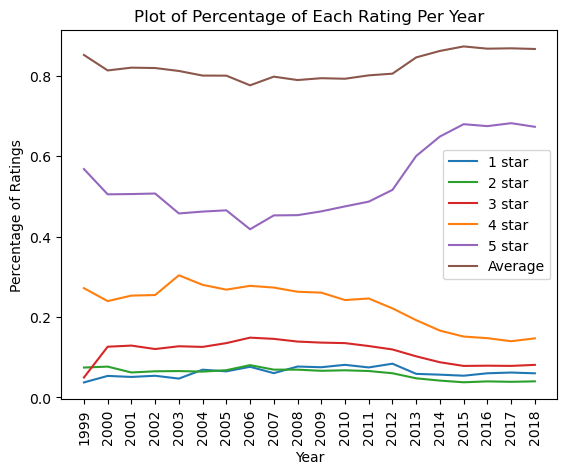

In [44]:
#This is for the Plot of the percentage of each rating each year. Its hard to read the rating otherwise
plt.plot(x, y1, color = 'tab:blue')
plt.plot(x, y2, color = 'tab:green')
plt.plot(x, y3, color = 'tab:red')
plt.plot(x, y4, color = 'tab:orange')
plt.plot(x, y5, color = 'tab:purple')
plt.plot(x, yAvg, color = 'tab:brown')

#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Percentage of Ratings")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['1 star', '2 star', '3 star', '4 star', '5 star', 'Average'])
plt.title("Plot of Percentage of Each Rating Per Year")
plt.show()

#from this plot we can see that the percentage of five stars has increased over the years resulting in an increase in the avg 

#so This concludes the first plot

histogram of rating with each review as stacked barplot
and we can do it both ways

what this means is that we can do a histogram based on the reviewLength between certain ranges to do that we will first decide draw a boxplot of the review lengths

In [45]:
mainDf['reviewLength'].max()

32721

count    497343.000000
mean        670.318963
std        1266.191356
min           1.000000
25%          57.000000
50%         210.000000
75%         710.000000
max       32721.000000
Name: reviewLength, dtype: float64

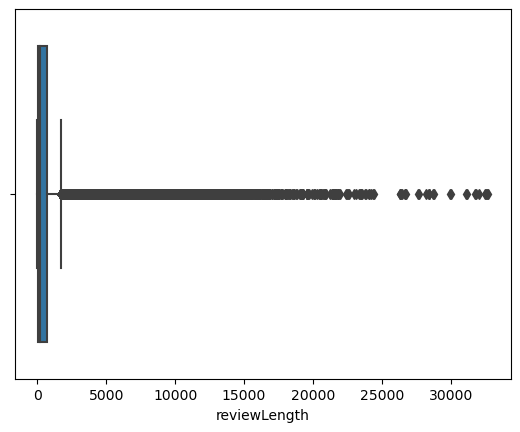

In [46]:
#first draw the boxplot
sns.boxplot(x='reviewLength', data=mainDf);
mainDf['reviewLength'].describe() #this doesnt seem so helpful for reviewLength.
#I'm instead going to get wordss since words are separated by spaces and it will help reduce the number a lot

In [47]:
mainDf['numWords'] = [len(x.split()) for x in mainDf['reviewText']]

In [48]:
mainDf.describe() #num words is way more useful than reviewLength

,rating,vote,reviewYear,reviewLength,numWords
count,497343.000000,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963,122.701429
std,1.185478,17.137017,3.899879,1266.191356,227.005962
min,1.000000,0.000000,1999.000000,1.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000,11.000000
50%,5.000000,0.000000,2014.000000,210.000000,40.000000
75%,5.000000,0.000000,2016.000000,710.000000,132.000000
max,5.000000,2474.000000,2018.000000,32721.000000,5928.000000


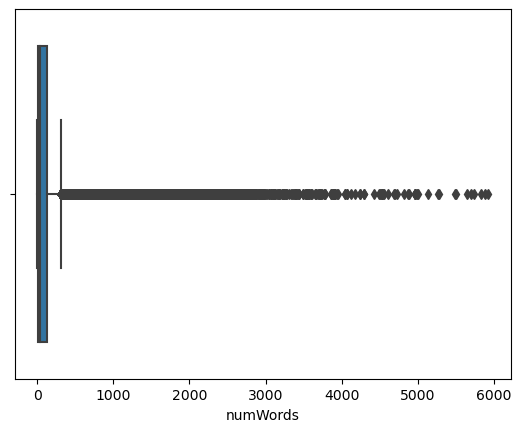

In [49]:
#now we will try this with the numWords instead
sns.boxplot(x='numWords', data=mainDf); #a lot of outliers but something we have to consider is that maybe reviews with 
#less than 10 words might not be that useful



In [50]:
#now we will determine outliers
lower, upper = np.percentile(mainDf['numWords'], [25, 75])
lower, upper





(11.0, 132.0)

In [51]:
# calculate IQR
iqr = upper - lower
iqr

121.0

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [52]:
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-170.5, 313.5)

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

count    497343.000000
mean        122.701429
std         227.005962
min           1.000000
25%          11.000000
50%          40.000000
75%         132.000000
max        5928.000000
Name: numWords, dtype: float64

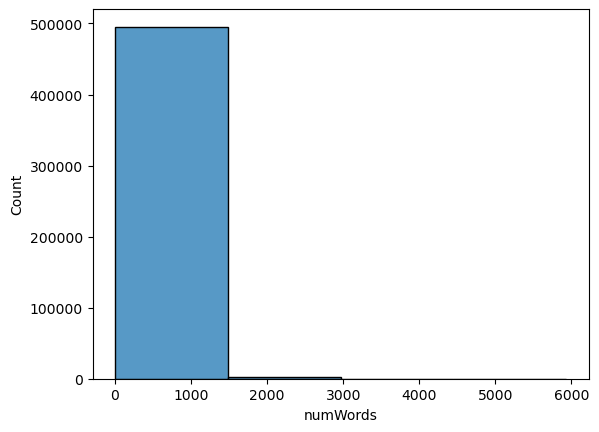

In [53]:
#Lets create a histogram to see how the data looks

sns.histplot(mainDf['numWords'], bins=4, kde=False);
mainDf['numWords'].describe()

In [54]:
#lets reduce the range of words

In [55]:
lower1, upper9 = np.percentile(mainDf['numWords'], [10, 94])
print(lower1, upper9)

2.0 469.0


In [56]:
upperNine = np.percentile(mainDf['numWords'], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
print (upperNine)

eightyFive = np.percentile(mainDf['numWords'], [85])
print(eightyFive)

[ 328.  356.  387.  425.  469.  525.  598.  694.  838. 1080. 5928.]
[231.]


In [57]:
#we notice that some reviews have either lots of words or not enough words so we will filter by having each review being above 10 words
#which is approx 25% and between 250 words. This between 1 sentence per review and a mini paragraph which is good

filteredDf = mainDf[mainDf['numWords'] > 10]
filteredDf #reduced the size of dataframe by 100,000 or about 20%


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21
...,...,...,...,...,...,...,...,...,...,...,...,...
497336,3.0,True,"05 20, 2017",A3JLLK1KJFD3BN,B01HFRICLE,A. Lai,This nostalgic game with updaged game play ele...,"special moves) looks great, plays awesome but ...",0,2017,259,47
497337,5.0,True,"07 1, 2017",A2NKYXCAGBGW7F,B01HGPUTCA,Snipun1,"This Work Great and easy to replace, I would n...",I plan on doing all my controllers this way now,0,2017,134,24
497340,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,0,2017,343,67
497341,4.0,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",0,2018,4158,779


In [58]:
filteredDf = filteredDf[filteredDf['numWords'] < 250]
filteredDf #this reduced size to about 300k which means we filtered  nearly 40% of our data whihc is good

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21
...,...,...,...,...,...,...,...,...,...,...,...,...
497334,5.0,True,"06 19, 2017",AVOS4AN9YUGCL,B01HFRICLE,Jim Y,If you played and enjoyed River City Ransom on...,Nostalgic Fun,0,2017,169,34
497336,3.0,True,"05 20, 2017",A3JLLK1KJFD3BN,B01HFRICLE,A. Lai,This nostalgic game with updaged game play ele...,"special moves) looks great, plays awesome but ...",0,2017,259,47
497337,5.0,True,"07 1, 2017",A2NKYXCAGBGW7F,B01HGPUTCA,Snipun1,"This Work Great and easy to replace, I would n...",I plan on doing all my controllers this way now,0,2017,134,24
497340,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,0,2017,343,67


In [59]:
mainDf = filteredDf
mainDf.describe()

,rating,vote,reviewYear,reviewLength,numWords
count,306127.000000,306127.000000,306127.000000,306127.000000,306127.000000
mean,4.121701,1.431354,2012.458127,396.839648,74.207126
std,1.252762,7.380440,3.914801,331.224020,60.611877
min,1.000000,0.000000,1999.000000,38.000000,11.000000
25%,4.000000,0.000000,2011.000000,136.000000,26.000000
50%,5.000000,0.000000,2014.000000,272.000000,51.000000
75%,5.000000,0.000000,2015.000000,572.000000,107.000000
max,5.000000,741.000000,2018.000000,2952.000000,249.000000


In [60]:
#now we will rerun all plots

In [61]:
#Vote distribution

In [62]:
#Average votes based on review length

In [63]:
#Average votes based on rating

In [64]:
#Average votes based on verified status

In [65]:
#

In [66]:
print(mainDf.describe())  #we just remembered that the unixReviewTime is useless so we will drop these as well

              rating           vote     reviewYear   reviewLength  \
count  306127.000000  306127.000000  306127.000000  306127.000000   
mean        4.121701       1.431354    2012.458127     396.839648   
std         1.252762       7.380440       3.914801     331.224020   
min         1.000000       0.000000    1999.000000      38.000000   
25%         4.000000       0.000000    2011.000000     136.000000   
50%         5.000000       0.000000    2014.000000     272.000000   
75%         5.000000       0.000000    2015.000000     572.000000   
max         5.000000     741.000000    2018.000000    2952.000000   

            numWords  
count  306127.000000  
mean       74.207126  
std        60.611877  
min        11.000000  
25%        26.000000  
50%        51.000000  
75%       107.000000  
max       249.000000  


In [67]:
#mainDf = mainDf.drop(['unixReviewTime'], axis = 1)

In [68]:
print(mainDf.describe())  #overall is the rating so we will change that column name to reflect that

              rating           vote     reviewYear   reviewLength  \
count  306127.000000  306127.000000  306127.000000  306127.000000   
mean        4.121701       1.431354    2012.458127     396.839648   
std         1.252762       7.380440       3.914801     331.224020   
min         1.000000       0.000000    1999.000000      38.000000   
25%         4.000000       0.000000    2011.000000     136.000000   
50%         5.000000       0.000000    2014.000000     272.000000   
75%         5.000000       0.000000    2015.000000     572.000000   
max         5.000000     741.000000    2018.000000    2952.000000   

            numWords  
count  306127.000000  
mean       74.207126  
std        60.611877  
min        11.000000  
25%        26.000000  
50%        51.000000  
75%       107.000000  
max       249.000000  


In [69]:
mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21


In [88]:
smallDf = mainDf.groupby(['reviewYear']).mean()
ratList = list(smallDf['rating'])
ratList

[4.315789473684211,
 4.077265973254086,
 4.088188976377952,
 4.04929982735469,
 4.042029616724738,
 3.9534209939826166,
 3.9672619047619047,
 3.8626577579806978,
 4.025261688764829,
 3.979693893014093,
 3.998126666186325,
 4.0016512030193425,
 4.040825127578524,
 4.087036499177074,
 4.267861342363953,
 4.191600933229641,
 4.141565575646601,
 4.148094877617966,
 4.11749080506743,
 4.104844173441735]

<AxesSubplot:xlabel='reviewYear'>

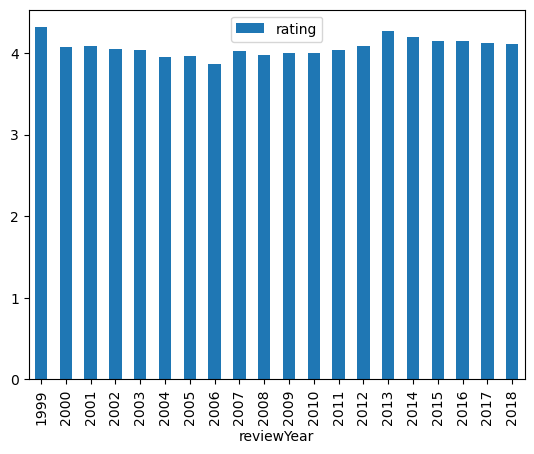

In [71]:
#plot between avg rating per year
smallDf.plot(y='rating',use_index='True',kind='bar')

<AxesSubplot:ylabel='reviewYear'>

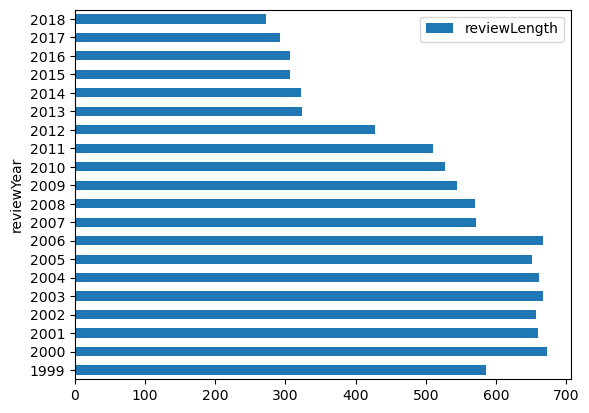

In [72]:
#plot of avg reveiwLengths per year 
smallDf.plot(y='reviewLength',use_index='True',kind='barh')

<AxesSubplot:ylabel='reviewYear'>

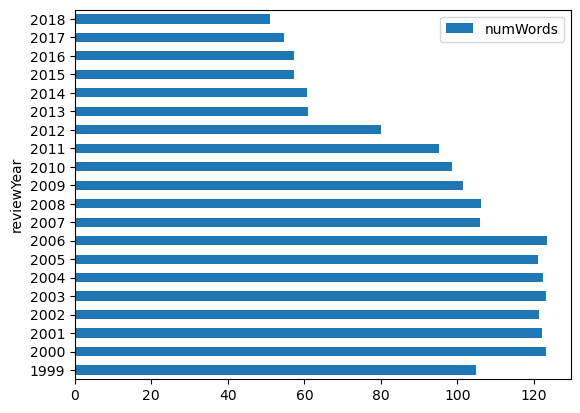

In [73]:
#plot of avg reveiwLengths per year 
smallDf.plot(y='numWords',use_index='True',kind='barh')

In [74]:
smallDfRAT = mainDf.groupby(['rating']).mean()
smallDfRAT

,verified,vote,reviewYear,reviewLength,numWords
rating,,,,,
1.0,0.482230,3.897074,2012.521931,433.011677,80.744937
2.0,0.542719,1.851644,2012.118089,493.936249,91.889001
3.0,0.621118,1.399037,2012.124193,465.231770,86.956553
4.0,0.626187,1.145156,2011.918217,452.814153,84.609580
5.0,0.705344,1.161104,2012.730505,350.561237,65.659425


<AxesSubplot:xlabel='rating'>

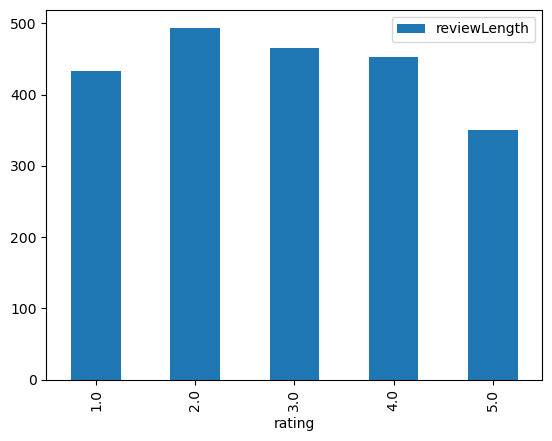

In [75]:
#plot of avg reveiwLengths per rating 
smallDfRAT.plot(y='reviewLength',use_index='True',kind='bar')

<AxesSubplot:xlabel='rating'>

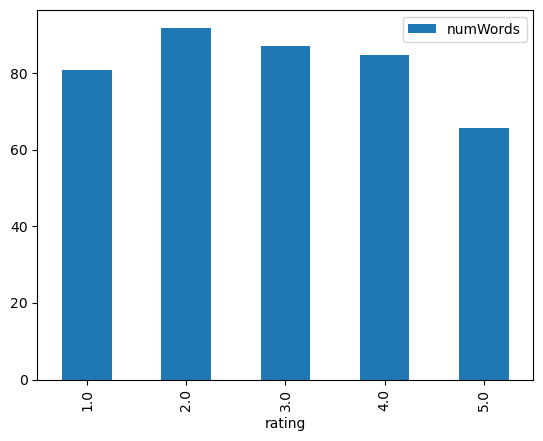

In [76]:
#plot of avg reveiwLengths per rating 
smallDfRAT.plot(y='numWords',use_index='True',kind='bar')

<AxesSubplot:xlabel='rating'>

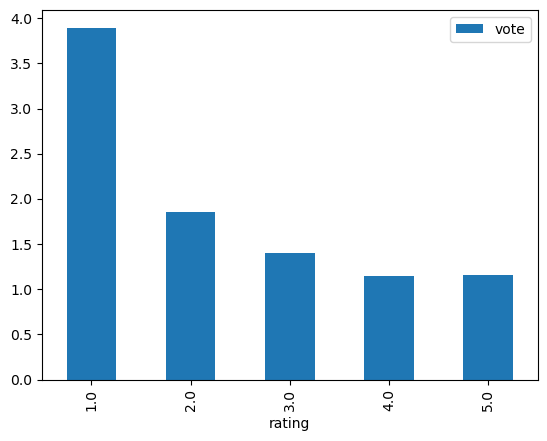

In [77]:
#plot of avg number of votes per rating 
smallDfRAT.plot(y='vote',use_index='True',kind='bar')
#here we can see that lower ratings recieve higher number of votes.

<AxesSubplot:>

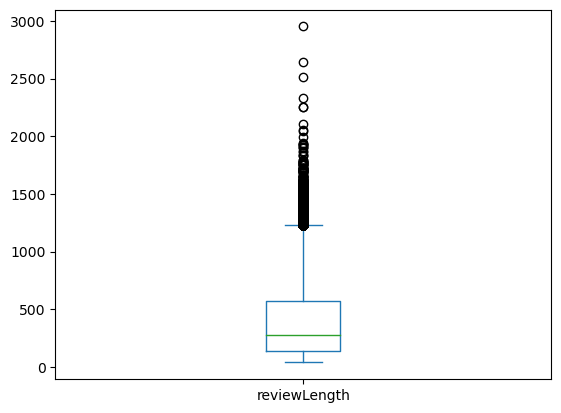

In [78]:
mainDf.plot(y='reviewLength',kind='box')

<AxesSubplot:>

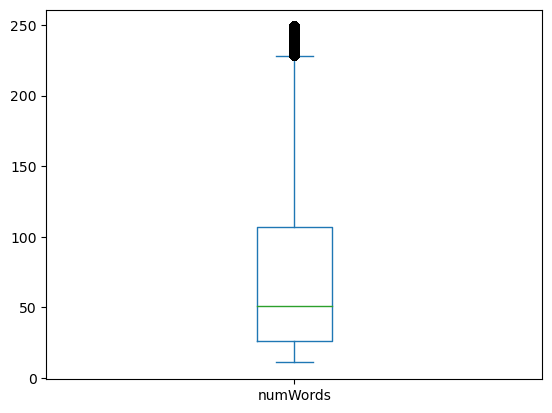

In [79]:
mainDf.plot(y='numWords',kind='box')

In [90]:
len(mainDf)

306127

In [91]:
mainTrain = mainDf[:(8*len(mainDf)//10)]
mainTest = mainDf[(8*len(mainDf)//10):]
print(len(mainTest))
print(len(mainTrain))

61226
244901


In [92]:
mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21


In [100]:
newDf = mainDf[['reviewerID','asin','rating']]
newDf

,reviewerID,asin,rating
0,A1HP7NVNPFMA4N,0700026657,5.0
1,A1JGAP0185YJI6,0700026657,4.0
3,A2204E1TH211HT,0700026657,2.0
4,A2RF5B5H74JLPE,0700026657,5.0
5,A11V6ZJ2FVQY1D,0700026657,4.0
...,...,...,...
497334,AVOS4AN9YUGCL,B01HFRICLE,5.0
497336,A3JLLK1KJFD3BN,B01HFRICLE,3.0
497337,A2NKYXCAGBGW7F,B01HGPUTCA,5.0
497340,ACIZ77IGIX2JL,B01HH6JEOC,3.0


In [106]:
newDf.to_csv("video_games.csv.gz",index=False,compression="gzip")

In [107]:
def readCSV(path):
  f = gzip.open(path, 'rt')
  f.readline()
  for l in f:
    yield l.strip().split(',')

In [126]:
allRatings = []
userRatings = defaultdict(list)

for user,review,r in readCSV("video_games.csv.gz"):
    r = float(r)
    allRatings.append((user,review,r))
    userRatings[user].append(r)

In [127]:
ratingsTrain = []

In [115]:
allRat1 = []
for l in readCSV("video_games.csv.gz"):
    allRat1.append(l)

In [113]:
globalAverage = sum(allRatings) / len(allRatings)
userAverage = {}
for u in userRatings:
    userAverage[u] = sum(userRatings[u]) / len(userRatings[u])

In [129]:
ratingsTrain = allRatings[:(8*len(mainDf)//10)]
ratingsValid = allRatings[(8*len(mainDf)//10):]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [130]:
allRatings[:5]

[('A1HP7NVNPFMA4N', '0700026657', 5.0),
 ('A1JGAP0185YJI6', '0700026657', 4.0),
 ('A2204E1TH211HT', '0700026657', 2.0),
 ('A2RF5B5H74JLPE', '0700026657', 5.0),
 ('A11V6ZJ2FVQY1D', '0700026657', 4.0)]

In [131]:
allRat1[:5]

[['A1HP7NVNPFMA4N', '0700026657', '5.0'],
 ['A1JGAP0185YJI6', '0700026657', '4.0'],
 ['A2204E1TH211HT', '0700026657', '2.0'],
 ['A2RF5B5H74JLPE', '0700026657', '5.0'],
 ['A11V6ZJ2FVQY1D', '0700026657', '4.0']]

In [132]:
ratingsTrain[:5]

[('A1HP7NVNPFMA4N', '0700026657', 5.0),
 ('A1JGAP0185YJI6', '0700026657', 4.0),
 ('A2204E1TH211HT', '0700026657', 2.0),
 ('A2RF5B5H74JLPE', '0700026657', 5.0),
 ('A11V6ZJ2FVQY1D', '0700026657', 4.0)]

In [133]:
betaU = {}
betaI = {}
for u in ratingsPerUser:
    betaU[u] = 0

for b in ratingsPerItem:
    betaI[b] = 0

In [134]:
alpha = globalAverage # Could initialize anywhere, this is a guess

In [135]:
def iterate(lamb):
    newAlpha = 0
    for u,b,r in ratingsTrain:
        newAlpha += r - (betaU[u] + betaI[b])
    alpha = newAlpha / len(ratingsTrain)
    for u in ratingsPerUser:
        newBetaU = 0
        for b,r in ratingsPerUser[u]:
            newBetaU += r - (alpha + betaI[b])
        betaU[u] = newBetaU / (lamb + len(ratingsPerUser[u]))
    for b in ratingsPerItem:
        newBetaI = 0
        for u,r in ratingsPerItem[b]:
            newBetaI += r - (alpha + betaU[u])
        betaI[b] = newBetaI / (lamb + len(ratingsPerItem[b]))
    mse = 0
    for u,b,r in ratingsTrain:
        prediction = alpha + betaU[u] + betaI[b]
        mse += (r - prediction)**2
    regularizer = 0
    for u in betaU:
        regularizer += betaU[u]**2
    for b in betaI:
        regularizer += betaI[b]**2
    mse /= len(ratingsTrain)
    return mse, mse + lamb*regularizer

In [136]:
mse,objective = iterate(1)
newMSE,newObjective = iterate(1)
iterations = 2

In [137]:
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(1)
    iterations += 1
    print("Objective after "
        + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after "
        + str(iterations) + " iterations = " + str(newMSE))

Objective after 3 iterations = 21758.201687764733
MSE after 3 iterations = 0.7659537284448795
Objective after 4 iterations = 21695.663675421638
MSE after 4 iterations = 0.7657674787524091
Objective after 5 iterations = 21661.259441046066
MSE after 5 iterations = 0.7657784833962605
Objective after 6 iterations = 21640.186279670936
MSE after 6 iterations = 0.7658053306217307
Objective after 7 iterations = 21626.33688803147
MSE after 7 iterations = 0.7658230612939364
Objective after 8 iterations = 21616.57302894863
MSE after 8 iterations = 0.7658315754673587
Objective after 9 iterations = 21609.208571387306
MSE after 9 iterations = 0.7658339820668973
Objective after 10 iterations = 21603.321300361244
MSE after 10 iterations = 0.7658328346759671
Objective after 11 iterations = 21598.398353171477
MSE after 11 iterations = 0.7658297797066068
Objective after 12 iterations = 21594.148543461997
MSE after 12 iterations = 0.7658257928486031
Objective after 13 iterations = 21590.401817583246
MSE a

In [138]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.5464452479705488


In [139]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(5)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 37082.24699273336
MSE after 2 iterations = 0.9001381351452469
Objective after 3 iterations = 36068.343782255535
MSE after 3 iterations = 0.9028042741208864
Objective after 4 iterations = 35960.13943379739
MSE after 4 iterations = 0.9032079707359678
Objective after 5 iterations = 35937.46497689897
MSE after 5 iterations = 0.9032918425719205
Objective after 6 iterations = 35929.6666295242
MSE after 6 iterations = 0.9033180422160918
Objective after 7 iterations = 35925.596893562535
MSE after 7 iterations = 0.9033303977714896
Objective after 8 iterations = 35922.84031836284
MSE after 8 iterations = 0.9033384415395003
Objective after 9 iterations = 35920.733743542405
MSE after 9 iterations = 0.9033446603833233
Objective after 10 iterations = 35919.044850990314
MSE after 10 iterations = 0.9033498116029656
Objective after 11 iterations = 35917.66533896188
MSE after 11 iterations = 0.9033541785183923
Objective after 12 iterations = 35916.52959454652
MSE after 12 

In [140]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.4900712993689362


In [141]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(3)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 32769.42023273576
MSE after 2 iterations = 0.8440994958889599
Objective after 3 iterations = 32985.019856861065
MSE after 3 iterations = 0.8430256421443827
Objective after 4 iterations = 33020.148020319706
MSE after 4 iterations = 0.8428753266370465
Objective after 5 iterations = 33028.048390288815
MSE after 5 iterations = 0.8428414338479796
Objective after 6 iterations = 33030.506621909
MSE after 6 iterations = 0.8428302937344844
Objective after 7 iterations = 33031.566945935774
MSE after 7 iterations = 0.8428250649151533
Objective after 8 iterations = 33032.18580988759
MSE after 8 iterations = 0.8428217913826594
Objective after 9 iterations = 33032.635827595404
MSE after 9 iterations = 0.8428193377229417
Objective after 10 iterations = 33033.00618019093
MSE after 10 iterations = 0.8428173210964249


In [142]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.487167372244404


In [143]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(7)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 36809.207240413
MSE after 2 iterations = 0.9499796499202888
Objective after 3 iterations = 36494.46733592334
MSE after 3 iterations = 0.950851953498327
Objective after 4 iterations = 36462.70613009686
MSE after 4 iterations = 0.9509698856281052
Objective after 5 iterations = 36454.6929728841
MSE after 5 iterations = 0.9509970944644035
Objective after 6 iterations = 36450.66688160606
MSE after 6 iterations = 0.951009794961643
Objective after 7 iterations = 36447.88684475378
MSE after 7 iterations = 0.9510186173308833
Objective after 8 iterations = 36445.773415575386
MSE after 8 iterations = 0.9510255627024333
Objective after 9 iterations = 36444.12244097248
MSE after 9 iterations = 0.9510311947243467
Objective after 10 iterations = 36442.82106179886
MSE after 10 iterations = 0.9510357831198594
Objective after 11 iterations = 36441.79101701528
MSE after 11 iterations = 0.951039516757418
Objective after 12 iterations = 36440.97355664934
MSE after 12 iteratio

In [144]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.5010460971916748


In [149]:
#COMPLETE LATENT FACTOR MODEL 
dataset[0]

{'overall': 5.0,
 'verified': True,
 'reviewTime': '10 17, 2015',
 'reviewerID': 'A1HP7NVNPFMA4N',
 'asin': '0700026657',
 'reviewerName': 'Ambrosia075',
 'reviewText': "This game is a bit hard to get the hang of, but when you do it's great.",
 'summary': "but when you do it's great.",
 'unixReviewTime': 1445040000}

In [158]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

In [159]:
for d in dataset:
    user,item = d['reviewerID'], d['asin']
    reviewsPerUser[user].append(d)
    reviewsPerItem[item].append(d)

In [179]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

In [180]:
for d in dataset:
    user,item = d['reviewerID'], d['asin']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)

In [181]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [160]:
ratingMean = sum([d['overall'] for d in dataset]) / len(dataset)
alpha = ratingMean

In [169]:
def predictRating(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d['asin']
        if i2 == item: continue
        ratings.append(d['overall'])
        similarities.append(Jaccard(usersPerItem[item],usersPerItem[i2]))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        return ratingMean

In [170]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [171]:
alwaysPredictMean = [ratingMean for d in dataset]

In [183]:
#cfPredictions = [predictRating(d['reviewerID'], d['asin']) for d in dataset]

In [195]:
labels = [d['overall'] for d in dataset]

In [184]:
userBiases = defaultdict(float)
itemBiases = defaultdict(float)

In [185]:
userGamma = {}
itemGamma = {}

In [186]:
K= 2

In [187]:
for u in reviewsPerUser:
    userGamma[u] = [random.random() * 0.1 - 0.05 for k in range(K)]

In [188]:
for i in reviewsPerItem:
    itemGamma[i] = [random.random() * 0.1 - 0.05 for k in range(K)]

In [189]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    global userGamma
    global itemGamma
    index = 0
    alpha = theta[index]
    index += 1
    userBiases = dict(zip(users, theta[index:index+nUsers]))
    index += nUsers
    itemBiases = dict(zip(items, theta[index:index+nItems]))
    index += nItems
    for u in users:
        userGamma[u] = theta[index:index+K]
        index += K
    for i in items:
        itemGamma[i] = theta[index:index+K]
        index += K

In [190]:
def inner(x, y):
    return sum([a*b for a,b in zip(x,y)])

In [191]:
def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item] + inner(userGamma[user], itemGamma[item])

In [203]:
def cost(theta, labels, lamb):
    unpack(theta)
    predictions = [prediction(d['reviewerID'], d['asin']) for d in dataset]
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in users:
        cost += lamb*userBiases[u]**2
        for k in range(K):
            cost += lamb*userGamma[u][k]**2
    for i in items:
        cost += lamb*itemBiases[i]**2
        for k in range(K):
            cost += lamb*itemGamma[i][k]**2
    return cost

In [204]:
def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(dataset)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    dUserGamma = {}
    dItemGamma = {}
    for u in reviewsPerUser:
        dUserGamma[u] = [0.0 for k in range(K)]
    for i in reviewsPerItem:
        dItemGamma[i] = [0.0 for k in range(K)]
    for d in dataset:
        u,i = d['reviewerID'], d['asin']
        pred = prediction(u, i)
        diff = pred - d['overall']
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[i] += 2/N*diff
        for k in range(K):
            dUserGamma[u][k] += 2/N*itemGamma[i][k]*diff
            dItemGamma[i][k] += 2/N*userGamma[u][k]*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
        for k in range(K):
            dUserGamma[u][k] += 2*lamb*userGamma[u][k]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
        for k in range(K):
            dItemGamma[i][k] += 2*lamb*itemGamma[i][k]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    for u in users:
        dtheta += dUserGamma[u]
    for i in items:
        dtheta += dItemGamma[i]
    return numpy.array(dtheta)

In [205]:
MSE(alwaysPredictMean, labels)

1.4052282625306614

In [206]:
N = len(dataset)
nUsers = len(reviewsPerUser)
nItems = len(reviewsPerItem)
users = list(reviewsPerUser.keys())
items = list(reviewsPerItem.keys())

In [207]:
scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + # Initialize alpha
                                   [0.0]*(nUsers+nItems) + # Initialize beta
                                   [random.random() * 0.1 - 0.05 for k in range(K*(nUsers+nItems))], # Gamma
                             derivative, args = (labels, 0.001))

MSE = 1.4052306915990758
MSE = 1.3952081291763037
MSE = 1.362307504947853
MSE = 11.890481907795415
MSE = 1.3623599171069873
MSE = 1.3361487493022872
MSE = 1.3222705678114974
MSE = 1.32203106803483
MSE = 1.3233307172434878
MSE = 1.325508121503334
MSE = 1.3259386904135306
MSE = 1.3260819273629931
MSE = 1.3261103719584786


(array([ 4.21206611e+00,  1.84393636e-02, -3.85384291e-03, ...,
         5.21035417e-07, -1.19793400e-06, -1.45142837e-06]),
 1.3595648714382114,
 {'grad': array([-2.39584915e-06,  7.13572679e-09, -7.49792150e-10, ...,
          1.03414468e-09, -2.37849968e-09, -2.86879503e-09]),
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 13,
  'nit': 10,
  'warnflag': 0})